## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [85]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [86]:
x_train.shape[0]

60000

There are 60000 training data set

In [87]:
x_test.shape[0]

10000

There are 10000 test data in the set

### Find dimensions of an image in the dataset

In [88]:
x_test.shape[1:3]

(28, 28)

As can be seen the data set is 28 X 28 data set with grey scale imge i.e 28 x 28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [89]:
num_classes = 10 # As the number of classes as per the fashin_mnist data set keras.utils.to_categorical

In [90]:
# One hot encoding for train
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=num_classes, dtype='float32'
)

In [91]:
# One hot encoding for train
y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=num_classes, dtype='float32'
)

### Normalize both the train and test image data from 0-255 to 0-1

In [92]:
# So that the extremes are taken care of
x_train = x_train.astype('float32') # To restrict the data size
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [93]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [94]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Reshape, MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [96]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
# model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization())

#Add Conv Layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(BatchNormalization())

#Add Dense Layers after flattening the data
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Add Output Layer
model.add(Dense(10, activation='softmax'))

In [97]:
#Specify Loss and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [100]:
#Train the model
callbacks = EarlyStopping(monitor='loss', patience=5)
model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=32, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4191 - accuracy: 0.8608 - val_loss: 0.3136 - val_accuracy: 0.8877
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2430 - accuracy: 0.9117 - val_loss: 0.3698 - val_accuracy: 0.8807
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1893 - accuracy: 0.9305 - val_loss: 0.3399 - val_accuracy: 0.8960
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1522 - accuracy: 0.9443 - val_loss: 0.5038 - val_accuracy: 0.8927
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1204 - accuracy: 0.9560 - val_loss: 0.3141 - val_accuracy: 0.9023
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0950 - accuracy: 0.9653 - val_loss: 0.4271 - val_accuracy: 0.9010
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0761 - accuracy: 0.9727 - val_loss: 0.4142 - val_accuracy:

In [109]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5264 - accuracy: 0.8970


[0.5264313220977783, 0.8970000147819519]

Model acuracy is 89.7%

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [103]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model2 = Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(Reshape((28,28,1),input_shape=(28,28,)))

#Add Conv Layer
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model2.add(BatchNormalization())

#Add Conv Layer
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model2.add(BatchNormalization())

#Add Maxpool
model2.add(MaxPool2D(pool_size=(2,2)))

#Add Dropout
model2.add(Dropout(0.25))

#Add Dense Layers after flattening the data
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))

#Add Output Layer
model2.add(Dense(10, activation='softmax'))

In [104]:
#Specify Loss and Optimizer
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [106]:
#Train the model
callbacks = EarlyStopping(monitor='loss', patience=5)
model2.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=32, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3871 - accuracy: 0.8615 - val_loss: 0.3112 - val_accuracy: 0.8861
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2548 - accuracy: 0.9068 - val_loss: 0.2842 - val_accuracy: 0.8958
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2155 - accuracy: 0.9200 - val_loss: 0.2514 - val_accuracy: 0.9122
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1880 - accuracy: 0.9294 - val_loss: 0.2399 - val_accuracy: 0.9137
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1630 - accuracy: 0.9395 - val_loss: 0.2839 - val_accuracy: 0.9065
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1441 - accuracy: 0.9464 - val_loss: 0.2672 - val_accuracy: 0.9183
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1266 - accuracy: 0.9529 - val_loss: 0.2452 - val_accuracy:

In [108]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.9199


[0.2914315164089203, 0.9199000000953674]

Model accuracy is 92%

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [111]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
datagen= ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

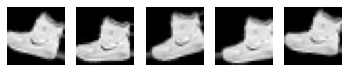

In [112]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [113]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model3 = Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model3.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#Add Conv Layer
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model3.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#normalize data
model3.add(tf.keras.layers.BatchNormalization())

#Add Maxpool
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dropout
model3.add(tf.keras.layers.Dropout(0.25))

#Add Dense Layers after flattening the data
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))

#Add Output Layer
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [114]:
#Specify Loss and Optimizer
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
#Train the model
callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model3.fit(datagen.flow(x_train, y_train), validation_data=(x_test,y_test), batch_size=32, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6180 - accuracy: 0.7701 - val_loss: 0.4826 - val_accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4652 - accuracy: 0.8253 - val_loss: 0.4500 - val_accuracy: 0.8294
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4227 - accuracy: 0.8411 - val_loss: 0.4029 - val_accuracy: 0.8484
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3956 - accuracy: 0.8531 - val_loss: 0.3560 - val_accuracy: 0.8712
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3788 - accuracy: 0.8595 - val_loss: 0.3504 - val_accuracy: 0.8681
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3615 - accuracy: 0.8663 - val_loss: 0.3303 - val_accuracy: 0.8779
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3446 - accuracy: 0.8719 - val_loss: 0.3463 -

###  Report the final train and validation accuracy

In [31]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8692


[0.3532792925834656, 0.8691999912261963]

The final train accuracy is 88.05% and validation accuracy is 86.67%

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [75]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [76]:
x_train.shape

(50000, 32, 32, 3)

In [77]:
x_test.shape

(10000, 32, 32, 3)

The data has got 50000 train  and 10000 test data.

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [78]:
data_gen= ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip = True
                          )

### **Prepare/fit the generator.**

In [79]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [80]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train/255
x_test = x_test/255
y_train = tf.keras.utils.to_categorical(
    y_train, 10, dtype='float32'
)
y_test = tf.keras.utils.to_categorical(
    y_test, 10, dtype='float32'
)

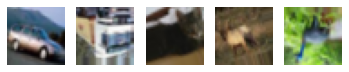

In [84]:
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train[1:10], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()